# Modelamiento del Fraude

In [4]:
!pip install pandas matplotlib seaborn

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ----------------------------- ---------- 5.8/7.8 MB 32.0 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 32.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 30.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 36.6 MB/s eta 0:00:00


In [ ]:
!pip install mlflow sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [86]:
!pip install xgboost imblearn

In [11]:
!pip install dvc dvc_s3

   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ------------ --------------------------- 3.9/12.6 MB 19.5 MB/s eta 0:00:01
   --------------------------------- ------ 10.5/12.6 MB 26.1 MB/s eta 0:00:01
   ---------------------------------------- 12.6/12.6 MB 26.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [69]:
!dvc pull

ERROR: failed to connect to s3 (proyecto-dvcstore/files/md5) - Unable to locate credentials
ERROR: failed to pull data from the cloud - 1 files failed to download


## Tratamiento de datos

In [8]:
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
import math
import seaborn as sns
import numpy as np

os.getcwd()
df = pd.read_csv("datos/fraud test.csv")
df['trans_date_trans_time']=pd.to_datetime(df['trans_date_trans_time'])

df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_8484\772688350.py:11: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['trans_date_trans_time']=pd.to_datetime(df['trans_date_trans_time'])


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:00,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:00,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:00,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:00,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:00,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [9]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [10]:
# Calculamos la distancia euclidiana
df['distancia_euclidiana'] = np.sqrt(
    (df['lat'] - df['merch_lat'])**2 + (df['long'] - df['merch_long'])**2
)

# Muestra las primeras filas con la columna de distancia
print(df[['lat', 'long', 'merch_lat', 'merch_long', 'distancia_euclidiana']].head())

       lat      long  merch_lat  merch_long  distancia_euclidiana
0  33.9659  -80.9355  33.986391  -81.200714              0.266004
1  40.3207 -110.4360  39.450498 -109.960431              0.991674
2  40.6729  -73.5365  40.495810  -74.196111              0.682970
3  28.5697  -80.8191  28.812398  -80.883061              0.250985
4  44.2529  -85.0170  44.959148  -85.884734              1.118816


In [11]:
df['hora_decimal'] = (
    df['trans_date_trans_time'].dt.hour +
    df['trans_date_trans_time'].dt.minute / 60 +
    df['trans_date_trans_time'].dt.second / 3600
)

print(df[['trans_date_trans_time', 'hora_decimal']].head())

  trans_date_trans_time  hora_decimal
0   2020-06-21 12:14:00     12.233333
1   2020-06-21 12:14:00     12.233333
2   2020-06-21 12:14:00     12.233333
3   2020-06-21 12:15:00     12.250000
4   2020-06-21 12:15:00     12.250000


In [12]:
df['dob'] = pd.to_datetime(df['dob'], format='%d/%m/%Y')
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Calcular la edad en años decimales
df['edad_decimal'] = (df['trans_date_trans_time'] - df['dob']).dt.total_seconds() / (365.25 * 24 * 3600)

print(df[['dob', 'trans_date_trans_time', 'edad_decimal']])

              dob trans_date_trans_time  edad_decimal
0      1968-03-19   2020-06-21 12:14:00     52.258754
1      1990-01-17   2020-06-21 12:14:00     30.427131
2      1970-10-21   2020-06-21 12:14:00     49.668747
3      1987-07-25   2020-06-21 12:15:00     32.910364
4      1955-07-06   2020-06-21 12:15:00     64.962383
...           ...                   ...           ...
555714 1966-02-13   2020-12-31 23:59:00     54.882955
555715 1999-12-27   2020-12-31 23:59:00     21.015741
555716 1981-11-29   2020-12-31 23:59:00     39.091032
555717 1965-12-15   2020-12-31 23:59:00     55.047226
555718 1993-05-10   2020-12-31 23:59:00     27.646815

[555719 rows x 3 columns]


In [13]:
from sklearn.preprocessing import OneHotEncoder
import joblib

# Crear y ajustar el OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
encoder.fit(df[['category']])

# Transformar la columna 'category'
encoded_categories = encoder.transform(df[['category']])
df_encoded = pd.DataFrame(encoded_categories, columns=encoder.get_feature_names_out())

# Guardar el OneHotEncoder ajustado en un archivo
joblib.dump(encoder, 'models/onehot_encoder.joblib')

# Concatenar la codificación con el DataFrame original (si es necesario)
df2 = pd.concat([df, df_encoded], axis=1)

print(df2.columns)

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'distancia_euclidiana',
       'hora_decimal', 'edad_decimal', 'category_entertainment',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel'],
      dtype='object')


In [14]:

selected_columns = ['distancia_euclidiana', 'hora_decimal', 'edad_decimal', 'amt', 'city_pop', 'state']
category_columns = df2.filter(regex='^category_').columns  # Selecciona todas las que comienzan con 'category_'

# Crear un nuevo DataFrame con las columnas seleccionadas
df_selected = df2[selected_columns + list(category_columns)]

print(df_selected.head())


   distancia_euclidiana  hora_decimal  edad_decimal    amt  city_pop state  \
0              0.266004     12.233333     52.258754   2.86    333497    SC   
1              0.991674     12.233333     30.427131  29.84       302    UT   
2              0.682970     12.233333     49.668747  41.28     34496    NY   
3              0.250985     12.250000     32.910364  60.05     54767    FL   
4              1.118816     12.250000     64.962383   3.19      1126    MI   

   category_entertainment  category_food_dining  category_gas_transport  \
0                     0.0                   0.0                     0.0   
1                     0.0                   0.0                     0.0   
2                     0.0                   0.0                     0.0   
3                     0.0                   0.0                     0.0   
4                     0.0                   0.0                     0.0   

   category_grocery_net  category_grocery_pos  category_health_fitness  \
0     

In [15]:
from sklearn.model_selection import train_test_split

X = df_selected
y = df2['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


category_target_mean = df2.groupby('state')['is_fraud'].mean()

# Crear una nueva columna con el encoding
X_train['state'] = X_train['state'].map(category_target_mean)

joblib.dump(category_target_mean, 'models/category_target_mean.joblib')
category_target_mean = joblib.load('models/category_target_mean.joblib')

X_test['state'] = X_test['state'].map(category_target_mean)

print(X_train.shape)
print(X_test.shape)

(444575, 20)
(111144, 20)


## Entrenamiento de modelos

### XGBoost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
from timeit import default_timer as timer



# Definir el modelo de XGBoost
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

# Definir los parámetros para la búsqueda aleatoria
params = {
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'n_estimators': [50, 100, 200],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Configuración de Stratified K-Fold
folds = 3
param_comb = 5
skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=1001)

# Configuración de RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=params,
    n_iter=param_comb,
    scoring='roc_auc',
    n_jobs=4,
    cv=skf.split(X_train, y_train),
    verbose=3,
    random_state=1001
)

# Temporización del proceso de búsqueda
start_time = timer()
random_search.fit(X_train, y_train)
end_time = timer()
print(f"Tiempo de búsqueda: {end_time - start_time} segundos")

# Resultados de la búsqueda aleatoria
print("Mejores parámetros:", random_search.best_params_)
print("Mejor puntuación de validación cruzada (AUC):", random_search.best_score_)

# Entrenar el modelo final con los mejores parámetros
best_model_xgb = random_search.best_estimator_



Fitting 3 folds for each of 5 candidates, totalling 15 fits


c:\Users\USER\Documents\Despliegues\proyecto final\proyecto_final_despliegue\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:10:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tiempo de búsqueda: 13.910722300002817 segundos
Mejores parámetros: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.3, 'colsample_bytree': 0.9}
Mejor puntuación de validación cruzada (AUC): 0.9961465020276936


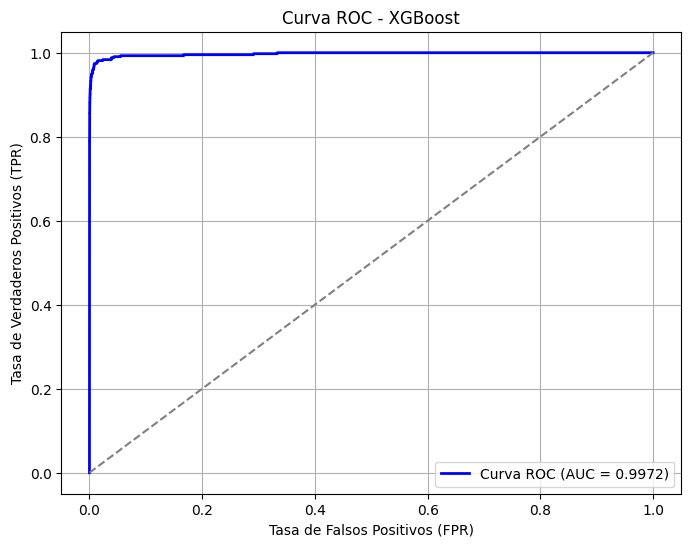

In [33]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obtener las probabilidades de predicción para la clase positiva
y_pred_proba = best_model_xgb.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - XGBoost')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [18]:
from sklearn.metrics import confusion_matrix, classification_report

# Calcular el punto óptimo de corte
# El punto óptimo es el que maximiza la suma de TPR y (1 - FPR)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Usar el umbral óptimo para hacer las predicciones binarias
y_pred_binary_optimal = (y_pred_proba >= optimal_threshold).astype(int)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_binary_optimal)

# Calcular las métricas
print("Matriz de Confusión:")
print(cm)

# Reporte de métricas relevantes
print("\nMétricas de clasificación (Precision, Recall, F1-Score):")
print(classification_report(y_test, y_pred_binary_optimal))

# Mostrar el umbral óptimo
print(f"\nUmbral óptimo: {optimal_threshold:.4f}")

Matriz de Confusión:
[[109062   1656]
 [     8    418]]

Métricas de clasificación (Precision, Recall, F1-Score):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    110718
           1       0.20      0.98      0.33       426

    accuracy                           0.99    111144
   macro avg       0.60      0.98      0.66    111144
weighted avg       1.00      0.99      0.99    111144


Umbral óptimo: 0.0028


### RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Definir el modelo de RandomForest
rf_model = RandomForestClassifier()

# Definir los parámetros para la búsqueda aleatoria
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [1, 10, 100],
    'min_samples_leaf': [1, 5, 10],
    'bootstrap': [True, False]
}

# Configuración de Stratified K-Fold
folds = 3
param_comb = 5
skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=1001)

# Configuración de RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=params,
    n_iter=param_comb,
    scoring='roc_auc',
    n_jobs=4,
    cv=skf.split(X_train, y_train),
    verbose=3,
    random_state=1001
)

# Temporización del proceso de búsqueda
start_time = timer()
random_search.fit(X_train, y_train)
end_time = timer()
print(f"Tiempo de búsqueda: {end_time - start_time} segundos")

# Resultados de la búsqueda aleatoria
print("Mejores parámetros:", random_search.best_params_)
print("Mejor puntuación de validación cruzada (AUC):", random_search.best_score_)

# Entrenar el modelo final con los mejores parámetros
best_model_rf = random_search.best_estimator_


best_model_rf.fit(X_train, y_train)

print("Mejores parámetros:", random_search.best_params_)
print("Mejor puntuación de validación cruzada (AUC):", random_search.best_score_)

joblib.dump(best_model_rf, 'models/randomforest_v1.joblib')

Fitting 3 folds for each of 5 candidates, totalling 15 fits


c:\Users\USER\Documents\Despliegues\proyecto final\proyecto_final_despliegue\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
3 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\Documents\Despliegues\proyecto final\proyecto_final_despliegue\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\Documents\Despliegues\proyecto final\proyecto_final_despliegue\.venv\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Use

Tiempo de búsqueda: 292.77789810000104 segundos
Mejores parámetros: {'n_estimators': 200, 'min_samples_split': 100, 'min_samples_leaf': 10, 'max_depth': 10, 'bootstrap': False}
Mejor puntuación de validación cruzada (AUC): 0.9890881673989479
Mejores parámetros: {'n_estimators': 200, 'min_samples_split': 100, 'min_samples_leaf': 10, 'max_depth': 10, 'bootstrap': False}
Mejor puntuación de validación cruzada (AUC): 0.9890881673989479


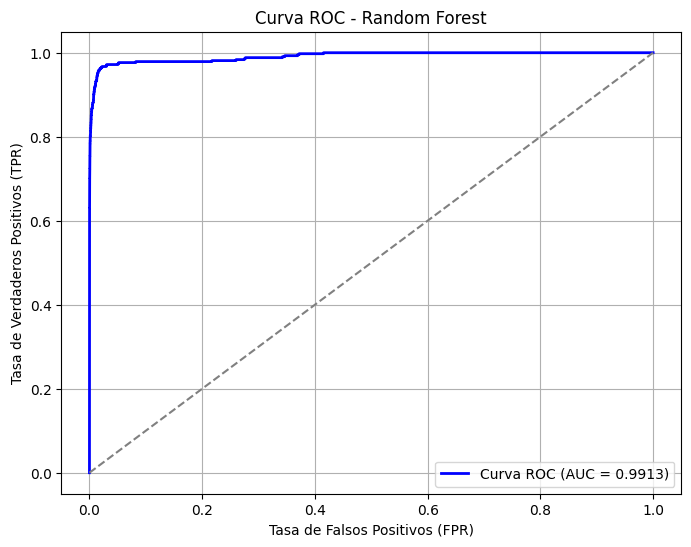

In [34]:

# Obtener las probabilidades de predicción para la clase positiva
y_pred_proba = best_model_rf.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Random Forest')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [21]:

# Calcular el punto óptimo de corte
# El punto óptimo es el que maximiza la suma de TPR y (1 - FPR)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Usar el umbral óptimo para hacer las predicciones binarias
y_pred_binary_optimal = (y_pred_proba >= optimal_threshold).astype(int)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_binary_optimal)

# Calcular las métricas
print("Matriz de Confusión:")
print(cm)

# Reporte de métricas relevantes
print("\nMétricas de clasificación (Precision, Recall, F1-Score):")
print(classification_report(y_test, y_pred_binary_optimal))

# Mostrar el umbral óptimo
print(f"\nUmbral óptimo: {optimal_threshold:.4f}")


Matriz de Confusión:
[[108250   2468]
 [    14    412]]

Métricas de clasificación (Precision, Recall, F1-Score):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    110718
           1       0.14      0.97      0.25       426

    accuracy                           0.98    111144
   macro avg       0.57      0.97      0.62    111144
weighted avg       1.00      0.98      0.99    111144


Umbral óptimo: 0.0090


### XGBoost with OVUN

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


# Definir el modelo de XGBoost
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

# Definir los parámetros para la búsqueda aleatoria
params = {
    'xgb__max_depth': [3, 4, 5, 6],  # Cambiar "max_depth" a "xgb__max_depth" porque estamos usando un pipeline
    'xgb__learning_rate': [0.01, 0.05, 0.1, 0.3],  # Lo mismo para todos los hiperparámetros
    'xgb__n_estimators': [50, 100, 200],
    'xgb__subsample': [0.7, 0.8, 0.9],
    'xgb__colsample_bytree': [0.7, 0.8, 0.9]
}

# Configuración de Stratified K-Fold
folds = 3
param_comb = 5
skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=1001)

# Configuración de SMOTE y RandomUnderSampler
smote = SMOTE(random_state=1001)
under_sampler = RandomUnderSampler(random_state=1001)

# Crear un pipeline que primero haga un oversampling (SMOTE) y un undersampling (RandomUnderSampler) antes de entrenar el modelo
pipeline = Pipeline([
    ('smote', smote),  # Sobremuestreo (SMOTE)
    ('undersample', under_sampler),  # Submuestreo (RandomUnderSampler)
    ('xgb', xgb_model)  # Modelo XGBoost
])

# Configuración de RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=params,
    n_iter=param_comb,
    scoring='roc_auc',
    n_jobs=4,
    cv=skf.split(X_train, y_train),
    verbose=3,
    random_state=1001
)

# Temporización del proceso de búsqueda
start_time = timer()
random_search.fit(X_train, y_train)
end_time = timer()
print(f"Tiempo de búsqueda: {end_time - start_time} segundos")

# Resultados de la búsqueda aleatoria
print("Mejores parámetros:", random_search.best_params_)
print("Mejor puntuación de validación cruzada (AUC):", random_search.best_score_)

# Entrenar el modelo final con los mejores parámetros
best_model_xgb_v2 = random_search.best_estimator_


joblib.dump(best_model_xgb_v2, 'models/xgb_v2.joblib')


Fitting 3 folds for each of 5 candidates, totalling 15 fits


c:\Users\USER\Documents\Despliegues\proyecto final\proyecto_final_despliegue\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\USER\Documents\Despliegues\proyecto final\proyecto_final_despliegue\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
c:\Users\USER\Documents\Despliegues\proyecto final\proyecto_final_despliegue\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:17:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encode

Tiempo de búsqueda: 35.0842030000058 segundos
Mejores parámetros: {'xgb__subsample': 0.8, 'xgb__n_estimators': 200, 'xgb__max_depth': 5, 'xgb__learning_rate': 0.3, 'xgb__colsample_bytree': 0.9}
Mejor puntuación de validación cruzada (AUC): 0.9955122131068839


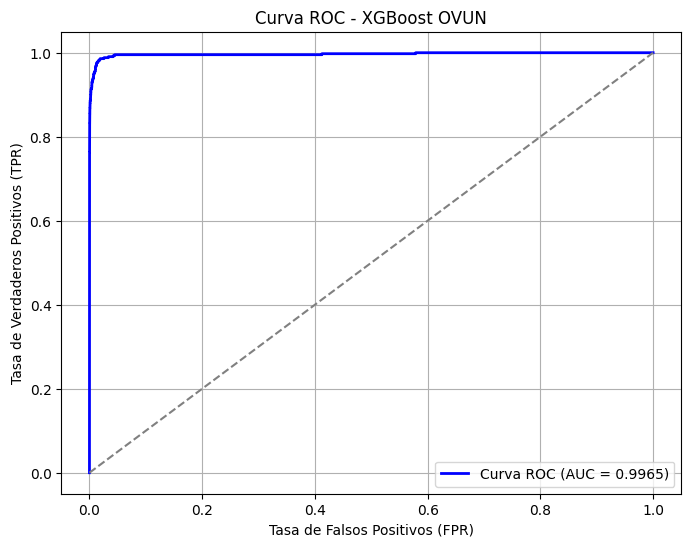

In [35]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obtener las probabilidades de predicción para la clase positiva
y_pred_proba = best_model_xgb_v2.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - XGBoost OVUN')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [24]:

# Calcular el punto óptimo de corte
# El punto óptimo es el que maximiza la suma de TPR y (1 - FPR)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Usar el umbral óptimo para hacer las predicciones binarias
y_pred_binary_optimal = (y_pred_proba >= optimal_threshold).astype(int)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_binary_optimal)

# Calcular las métricas
print("Matriz de Confusión:")
print(cm)

# Reporte de métricas relevantes
print("\nMétricas de clasificación (Precision, Recall, F1-Score):")
print(classification_report(y_test, y_pred_binary_optimal))

# Mostrar el umbral óptimo
print(f"\nUmbral óptimo: {optimal_threshold:.4f}")

Matriz de Confusión:
[[108623   2095]
 [     6    420]]

Métricas de clasificación (Precision, Recall, F1-Score):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    110718
           1       0.17      0.99      0.29       426

    accuracy                           0.98    111144
   macro avg       0.58      0.98      0.64    111144
weighted avg       1.00      0.98      0.99    111144


Umbral óptimo: 0.0129


# MLFlow

### XGBoost

In [47]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import precision_score, recall_score, auc
import xgboost as xgb

# Defina el servidor para llevar el registro de modelos y artefactos
mlflow.set_tracking_uri('http://localhost:5000')
# Registre el experimento
experiment = mlflow.set_experiment("fraud-detection")

# Aquí se ejecuta MLflow sin especificar un nombre o id del experimento. MLflow los crea un experimento por defecto y guarda las características del experimento y las métricas definidas.
# Para ver el resultado de las corridas, haga clic en Experimentos en el menú izquierdo. 
with mlflow.start_run(experiment_id=experiment.experiment_id):
    # Defina los parámetros del modelo
    subsample = 0.8
    n_estimators = 200
    max_depth = 5
    learning_rate = 0.3
    colsample_bytree = 0.9

    # Cree el modelo con los parámetros definidos y entrénelo
    xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False,
                                  subsample=subsample,
                                  n_estimators=n_estimators,
                                  max_depth=max_depth,
                                  learning_rate=learning_rate,
                                  colsample_bytree=colsample_bytree,
                                  random_state=1001)

    xgb_model.fit(X_train, y_train)

    # Realice predicciones de prueba
    predictions = xgb_model.predict(X_test)
    y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]  # Probabilidades para calcular AUC y Gini

    # Registre los parámetros
    mlflow.log_param("subsample", subsample)
    mlflow.log_param("n_estimators", n_estimators)
    mlflow.log_param("max_depth", max_depth)
    mlflow.log_param("learning_rate", learning_rate)
    mlflow.log_param("colsample_bytree", colsample_bytree)

    # Registre el modelo
    mlflow.sklearn.log_model(xgb_model, "xgb-model")

    # Calcular AUC y Gini

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)
    auc_value = auc(fpr, tpr)
    gini = 2 * auc_value - 1  # Fórmula del Gini

    # Calcular precisión y recall para la clase positiva (1)
    precision = precision_score(y_test, predictions, pos_label=1)
    recall = recall_score(y_test, predictions, pos_label=1)

    # Registre las métricas
    mlflow.log_metric("AUC", auc_value)
    mlflow.log_metric("Gini", gini)
    mlflow.log_metric("Precision_Positive_Class", precision)
    mlflow.log_metric("Recall_Positive_Class", recall)

    # Imprimir las métricas para la consola
    print(f"AUC: {auc_value:.4f}")
    print(f"Gini: {gini:.4f}")
    print(f"Precisión (Clase positiva): {precision:.4f}")
    print(f"Recall (Clase positiva): {recall:.4f}")

joblib.dump(xgb_model, 'models/xgb_v1.joblib')

c:\Users\USER\Documents\Despliegues\proyecto final\proyecto_final_despliegue\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:51:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
2024/11/10 21:51:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/10 21:51:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run inquisitive-lynx-109 at: http://localhost:5000/#/experiments/827426671080602420/runs/331fc0ccab5240ba926f23d53b95c84c.
2024/11/10 21:51:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/827426671080602420.


AUC: 0.9969
Gini: 0.9938
Precisión (Clase positiva): 0.9274
Recall (Clase positiva): 0.8099


['models/xgb_v1.joblib']

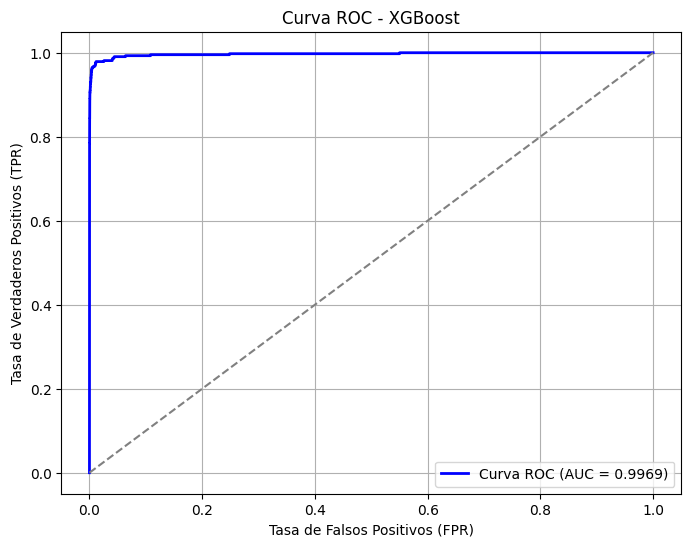

Matriz de Confusión:
[[110691     27]
 [    81    345]]

Métricas de clasificación (Precision, Recall, F1-Score):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.93      0.81      0.86       426

    accuracy                           1.00    111144
   macro avg       0.96      0.90      0.93    111144
weighted avg       1.00      1.00      1.00    111144



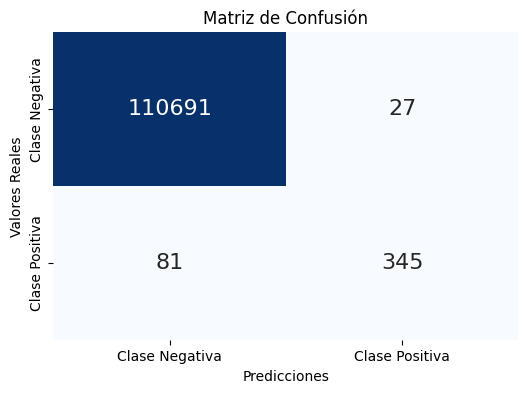

In [48]:
import seaborn as sns

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - XGBoost')
plt.legend(loc='lower right')
plt.grid()
plt.show()



cm = confusion_matrix(y_test, predictions)

print("Matriz de Confusión:")
print(cm)
print("\nMétricas de clasificación (Precision, Recall, F1-Score):")
print(classification_report(y_test, predictions))



# Crear un gráfico de calor para la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})

# Etiquetas y título
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.title("Matriz de Confusión")
plt.xticks([0.5, 1.5], ['Clase Negativa', 'Clase Positiva'])  # Personaliza las etiquetas si es necesario
plt.yticks([0.5, 1.5], ['Clase Negativa', 'Clase Positiva'])

plt.show()


### XGBoost v2

In [49]:

# Defina el servidor para llevar el registro de modelos y artefactos
mlflow.set_tracking_uri('http://localhost:5000')
# Registre el experimento
experiment = mlflow.set_experiment("fraud-detection")

# Aquí se ejecuta MLflow sin especificar un nombre o id del experimento. MLflow los crea un experimento por defecto y guarda las características del experimento y las métricas definidas.
# Para ver el resultado de las corridas, haga clic en Experimentos en el menú izquierdo. 
with mlflow.start_run(experiment_id=experiment.experiment_id):
    # Defina los parámetros del modelo
    subsample = 0.8
    n_estimators = 200
    max_depth = 5
    learning_rate = 0.3
    colsample_bytree = 0.9

    # Definir el modelo XGBoost
    xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False,
                                  subsample=subsample,
                                  n_estimators=n_estimators,
                                  max_depth=max_depth,
                                  learning_rate=learning_rate,
                                  colsample_bytree=colsample_bytree,
                                  random_state=1001)

    # Definir el pipeline con SMOTE y undersampling
    oversample = SMOTE(sampling_strategy='minority')
    undersample = RandomUnderSampler(sampling_strategy='majority')
    
    # Creando el pipeline con el modelo y los pasos de balanceo
    pipeline = Pipeline(steps=[('o', oversample), ('u', undersample), ('model', xgb_model)])

    # Entrenar el modelo con el balanceo de clases
    pipeline.fit(X_train, y_train)

    # Realice predicciones de prueba
    predictions = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]  # Probabilidades para calcular AUC y Gini

    # Registre los parámetros
    mlflow.log_param("subsample", subsample)
    mlflow.log_param("n_estimators", n_estimators)
    mlflow.log_param("max_depth", max_depth)
    mlflow.log_param("learning_rate", learning_rate)
    mlflow.log_param("colsample_bytree", colsample_bytree)

    # Registre el modelo
    mlflow.sklearn.log_model(pipeline, "xgb-model-ovun")

    # Calcular AUC y Gini
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)
    auc_value = auc(fpr, tpr)
    gini = 2 * auc_value - 1  # Fórmula del Gini

    # Calcular precisión y recall para la clase positiva (1)
    precision = precision_score(y_test, predictions, pos_label=1)
    recall = recall_score(y_test, predictions, pos_label=1)

    # Registre las métricas
    mlflow.log_metric("AUC", auc_value)
    mlflow.log_metric("Gini", gini)
    mlflow.log_metric("Precision_Positive_Class", precision)
    mlflow.log_metric("Recall_Positive_Class", recall)

    # Imprimir las métricas para la consola
    print(f"AUC: {auc_value:.4f}")
    print(f"Gini: {gini:.4f}")
    print(f"Precisión (Clase positiva): {precision:.4f}")
    print(f"Recall (Clase positiva): {recall:.4f}")

joblib.dump(xgb_model, 'models/xgb_v2.joblib')


c:\Users\USER\Documents\Despliegues\proyecto final\proyecto_final_despliegue\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:51:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
2024/11/10 21:52:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/10 21:52:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run awesome-croc-794 at: http://localhost:5000/#/experiments/827426671080602420/runs/9cd23cbcf9a54f02a30a6700700a0bef.
2024/11/10 21:52:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/827426671080602420.


AUC: 0.9965
Gini: 0.9929
Precisión (Clase positiva): 0.6831
Recall (Clase positiva): 0.8803


['models/xgb_v2.joblib']

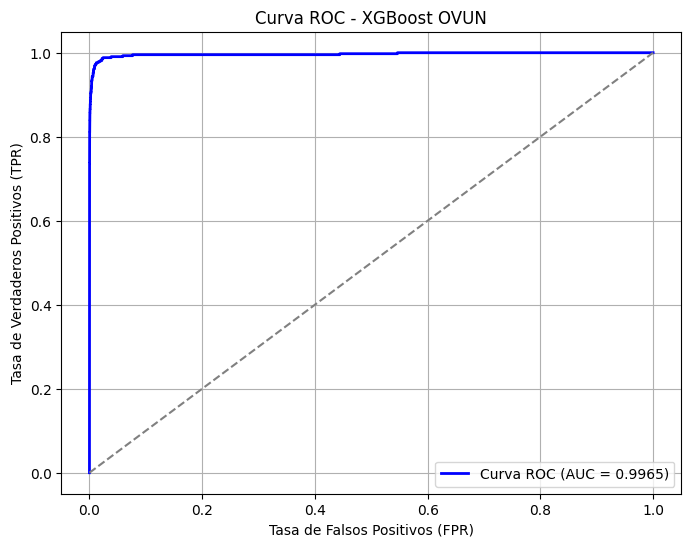

Matriz de Confusión:
[[110544    174]
 [    51    375]]

Métricas de clasificación (Precision, Recall, F1-Score):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.68      0.88      0.77       426

    accuracy                           1.00    111144
   macro avg       0.84      0.94      0.88    111144
weighted avg       1.00      1.00      1.00    111144



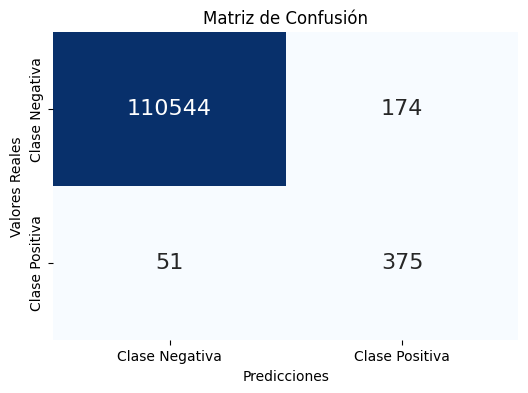

In [50]:
# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - XGBoost OVUN')
plt.legend(loc='lower right')
plt.grid()
plt.show()





cm = confusion_matrix(y_test, predictions)

print("Matriz de Confusión:")
print(cm)
print("\nMétricas de clasificación (Precision, Recall, F1-Score):")
print(classification_report(y_test, predictions))



# Crear un gráfico de calor para la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})

# Etiquetas y título
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.title("Matriz de Confusión")
plt.xticks([0.5, 1.5], ['Clase Negativa', 'Clase Positiva'])  # Personaliza las etiquetas si es necesario
plt.yticks([0.5, 1.5], ['Clase Negativa', 'Clase Positiva'])

plt.show()

### Random Forest

In [51]:

# Defina el servidor para llevar el registro de modelos y artefactos
mlflow.set_tracking_uri('http://localhost:5000')
# Registre el experimento
experiment = mlflow.set_experiment("fraud-detection")

# Aquí se ejecuta MLflow sin especificar un nombre o id del experimento. MLflow los crea un experimento por defecto y guarda las características del experimento y las métricas definidas.
# Para ver el resultado de las corridas, haga clic en Experimentos en el menú izquierdo. 
with mlflow.start_run(experiment_id=experiment.experiment_id):
    # Defina los mejores parámetros del modelo
    n_estimators = 200
    max_depth = 10
    min_samples_split = 100
    min_samples_leaf = 10
    bootstrap = False

    # Definir el modelo RandomForest con los mejores parámetros
    rf_model = RandomForestClassifier(n_estimators=n_estimators,
                                      max_depth=max_depth,
                                      min_samples_split=min_samples_split,
                                      min_samples_leaf=min_samples_leaf,
                                      bootstrap=bootstrap,
                                      random_state=1001)

    # Entrenar el modelo sin aplicar técnicas de balanceo
    rf_model.fit(X_train, y_train)

    # Realice predicciones de prueba
    predictions = rf_model.predict(X_test)
    y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # Probabilidades para calcular AUC y Gini

    # Registre los parámetros
    mlflow.log_param("n_estimators", n_estimators)
    mlflow.log_param("max_depth", max_depth)
    mlflow.log_param("min_samples_split", min_samples_split)
    mlflow.log_param("min_samples_leaf", min_samples_leaf)
    mlflow.log_param("bootstrap", bootstrap)

    # Registre el modelo
    mlflow.sklearn.log_model(rf_model, "rf-model")

    # Calcular AUC y Gini
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)
    auc_value = auc(fpr, tpr)
    gini = 2 * auc_value - 1  # Fórmula del Gini

    # Calcular precisión y recall para la clase positiva (1)
    precision = precision_score(y_test, predictions, pos_label=1)
    recall = recall_score(y_test, predictions, pos_label=1)

    # Registre las métricas
    mlflow.log_metric("AUC", auc_value)
    mlflow.log_metric("Gini", gini)
    mlflow.log_metric("Precision_Positive_Class", precision)
    mlflow.log_metric("Recall_Positive_Class", recall)

    # Imprimir las métricas para la consola
    print(f"AUC: {auc_value:.4f}")
    print(f"Gini: {gini:.4f}")
    print(f"Precisión (Clase positiva): {precision:.4f}")
    print(f"Recall (Clase positiva): {recall:.4f}")

joblib.dump(rf_model, 'models/xgb_v2.joblib')

2024/11/10 21:54:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/10 21:54:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run rogue-dog-116 at: http://localhost:5000/#/experiments/827426671080602420/runs/0f463d18117d4b9da1ec5f6c285a879f.
2024/11/10 21:54:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/827426671080602420.


AUC: 0.9902
Gini: 0.9804
Precisión (Clase positiva): 0.9567
Recall (Clase positiva): 0.5188


['models/xgb_v2.joblib']

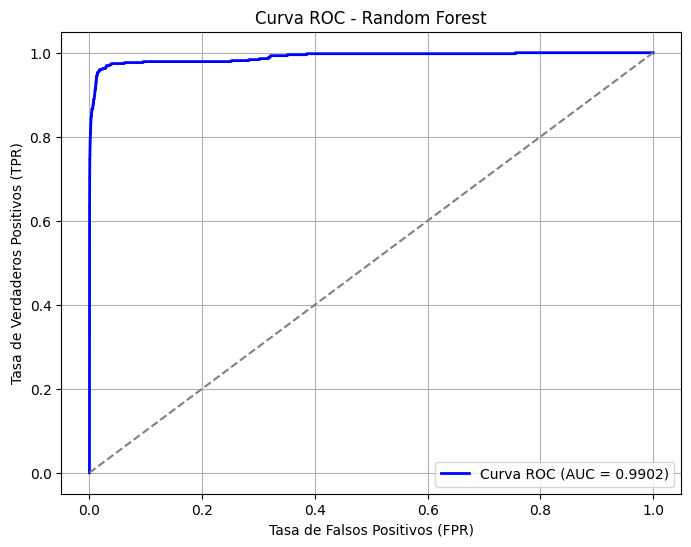

Matriz de Confusión:
[[110708     10]
 [   205    221]]

Métricas de clasificación (Precision, Recall, F1-Score):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.96      0.52      0.67       426

    accuracy                           1.00    111144
   macro avg       0.98      0.76      0.84    111144
weighted avg       1.00      1.00      1.00    111144



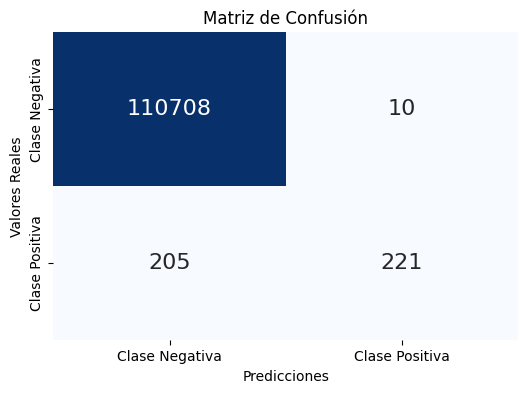

In [52]:
# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Random Forest')
plt.legend(loc='lower right')
plt.grid()
plt.show()



cm = confusion_matrix(y_test, predictions)

print("Matriz de Confusión:")
print(cm)
print("\nMétricas de clasificación (Precision, Recall, F1-Score):")
print(classification_report(y_test, predictions))



# Crear un gráfico de calor para la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})

# Etiquetas y título
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.title("Matriz de Confusión")
plt.xticks([0.5, 1.5], ['Clase Negativa', 'Clase Positiva'])  # Personaliza las etiquetas si es necesario
plt.yticks([0.5, 1.5], ['Clase Negativa', 'Clase Positiva'])

plt.show()